In [1]:
import embedders

In [2]:
import embedders.gaussian_mixture


pm = embedders.manifolds.ProductManifold(signature=[(1,3),(1,3),(-1,3),(-1,3),(0,3)])

X, y = embedders.gaussian_mixture.gaussian_mixture(pm, 1000)

/Users/phil/miniforge3/envs/embedders2/lib/python3.10/site-packages/torch/distributions/wishart.py:271: UserWarning: Singular sample detected.
  warnings.warn("Singular sample detected.")


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

pdt = embedders.tree_new.ProductSpaceDT(pm=pm, n_features="d_choose_2")
pdt.fit(X_train, y_train)

print(f"{pdt.score(X_test, y_test).float().mean().item():.4f}")

0.9850


In [9]:
pdt.__dict__

{'pm': <embedders.manifolds.ProductManifold at 0x349d0a770>,
 'max_depth': -1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_impurity_decrease': 0.0,
 'use_special_dims': False,
 'n_features': 'd_choose_2',
 'ablate_midpoints': False,
 'batch_size': None,
 'batched': True,
 'task': 'classification',
 'criterion': 'gini',
 'nodes': [<embedders.tree_new.DecisionNode at 0x3640ebb50>,
 'permutations': None,
 'angle2man': [0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  4,
  4],
 'special_first': [True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  False,
  False,
  False,
  False,
  False],
 'angle_dims': [(0, 1),
  (0, 2),
  (0, 3),
  (1, 2),
  (1, 3),
  (2, 3),
  (4, 5),
  (4, 6),
  (4, 7),
  (5, 6),
  (5,

In [12]:
pdt.nodes[0].__dict__

{'value': None,
 'probs': None,
 'feature': 16,
 'theta': 2.141489028930664,
 'left': <embedders.tree_new.DecisionNode at 0x3640eba00>,
 'right': <embedders.tree_new.DecisionNode at 0x3640ea860>}

In [13]:
pdt.angle_dims[16]

(9, 11)

In [14]:
pdt.angle_dims

[(0, 1),
 (0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (2, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 6),
 (5, 7),
 (6, 7),
 (8, 9),
 (8, 10),
 (8, 11),
 (9, 10),
 (9, 11),
 (10, 11),
 (12, 13),
 (12, 14),
 (12, 15),
 (13, 14),
 (13, 15),
 (14, 15),
 (None, 16),
 (None, 17),
 (None, 18),
 (16, 17),
 (16, 18),
 (17, 18)]

In [19]:
X.shape

torch.Size([1000, 19])

(-19592.5, 147.62948608398438)

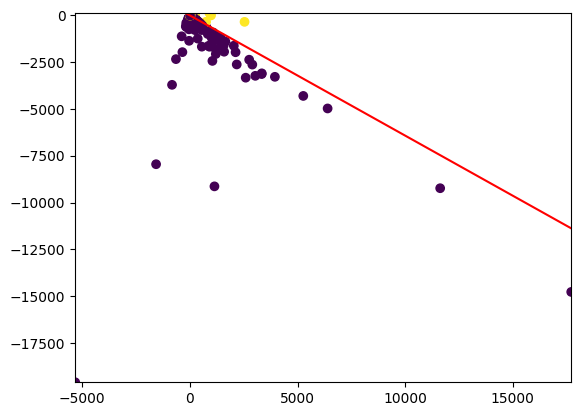

In [34]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(X[:,9].numpy(), X[:,11].numpy(), c=y)

# plot decision boundary
theta = 2.141489028930664
c = np.cos(theta)
s = np.sin(theta)
plt.plot([-s*1e10, s*1e10], [-c*1e10, c*1e10], 'r-')

# put boundaries back
plt.xlim(X[:,9].min(), X[:,9].max())
plt.ylim(X[:,11].min(), X[:,11].max())


In [24]:
pm.dim2man

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 3,
 13: 3,
 14: 3,
 15: 3,
 16: 4,
 17: 4,
 18: 4}